### IMPORTING THE LIBRARIES

In [ ]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from scipy import stats
import tensorflow as tf
import seaborn as sns
from pylab import rcParams
from sklearn.model_selection import train_test_split
from keras.models import Model, load_model
from keras.layers import Input, Dense
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers
%matplotlib inline
sns.set(style='whitegrid', palette='muted', font_scale=1.5)
rcParams['figure.figsize'] = 14, 8
RANDOM_SEED = 42
LABELS = ["Normal", "Fraud"]

### LOADING THE DATASET

In [ ]:
df = pd.read_csv("/content/creditcard.csv")
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52399,45430,-0.393724,1.076270,1.215160,-0.292258,0.644125,0.082382,0.696710,0.050672,-0.542230,...,-0.240912,-0.525893,-0.114636,-0.749315,-0.110568,0.148512,0.289755,0.111836,1.79,0.0
52400,45430,-0.865944,-1.627775,1.149352,-1.973850,-1.459391,0.810281,1.173029,-0.303693,-2.490480,...,-0.081097,-0.448457,0.925828,-0.854552,-0.172273,-0.420190,-0.154881,-0.070797,435.70,0.0
52401,45433,-2.402831,1.995293,1.437343,-0.801392,0.456753,1.725210,-0.802572,-3.440956,-0.167532,...,3.716247,-1.463853,0.542848,-0.722306,0.003853,0.164883,0.356353,0.142814,7.74,0.0
52402,45434,-1.149875,0.824841,2.348260,1.089333,-1.092394,0.408256,0.049875,0.654609,-0.364835,...,0.204445,0.457811,0.071950,0.410984,0.178962,-0.259354,-0.012942,0.038725,107.02,0.0


In [ ]:
df.shape

(52404, 31)

In [ ]:
df.isnull().values.any()

np.True_

<ipython-input-5-dc156366419e>:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  count_classes = pd.value_counts(df['Class'], sort = True)


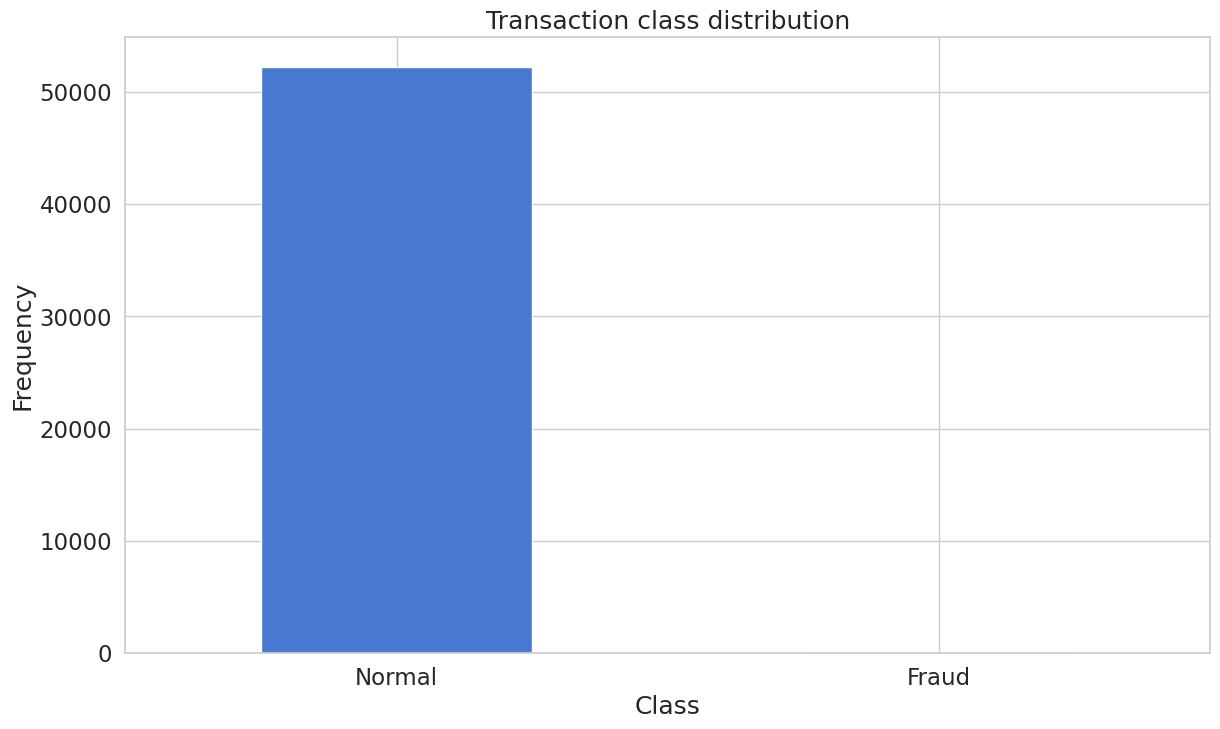

In [ ]:
count_classes = pd.value_counts(df['Class'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Transaction class distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency");

In [ ]:
frauds = df[df.Class == 1]
normal = df[df.Class == 0]

In [ ]:
frauds.shape

(150, 31)

In [ ]:
normal.shape

(52253, 31)

In [ ]:
frauds.Amount.describe()

,Amount
count,150.000000
mean,98.848400
std,232.056904
min,0.000000
25%,1.000000
50%,8.370000
75%,99.990000
max,1809.680000


In [ ]:
normal.Amount.describe()

,Amount
count,52253.000000
mean,94.082608
std,252.946478
min,0.000000
25%,7.680000
50%,25.450000
75%,86.400000
max,12910.930000


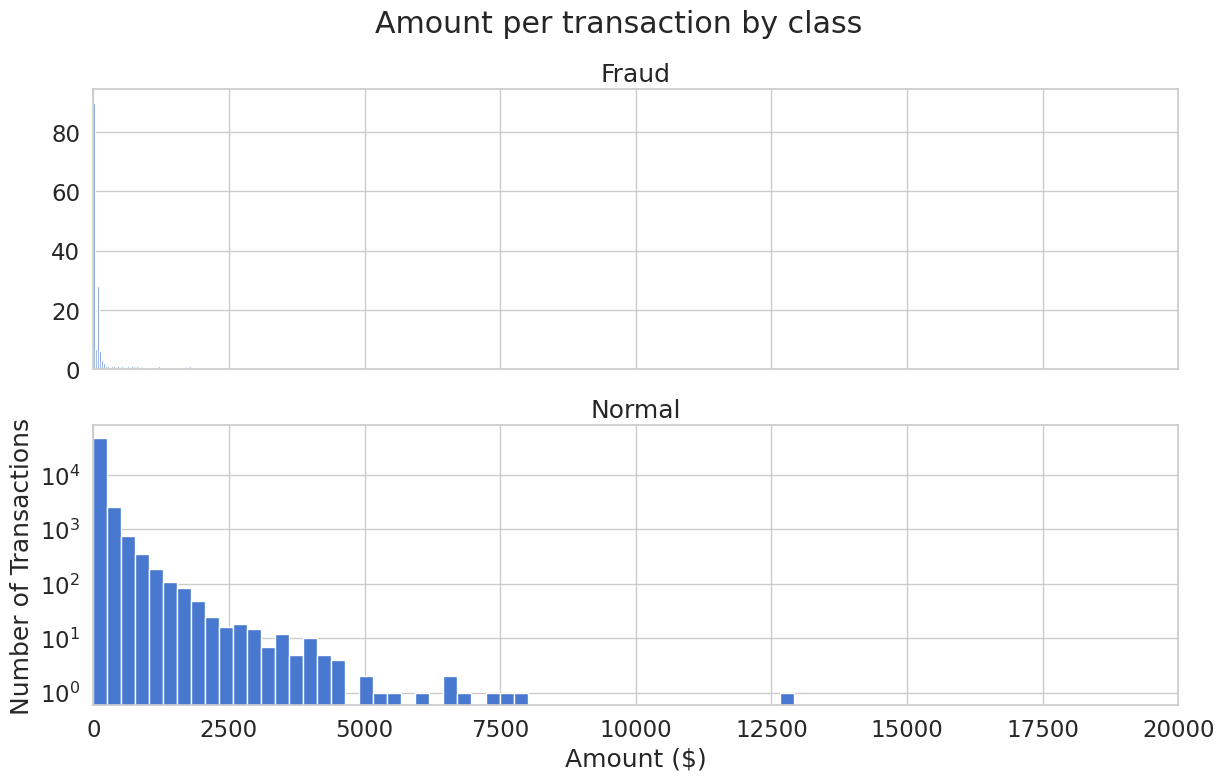

In [ ]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount per transaction by class')
bins = 50
ax1.hist(frauds.Amount, bins = bins)
ax1.set_title('Fraud')
ax2.hist(normal.Amount, bins = bins)
ax2.set_title('Normal')
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show();

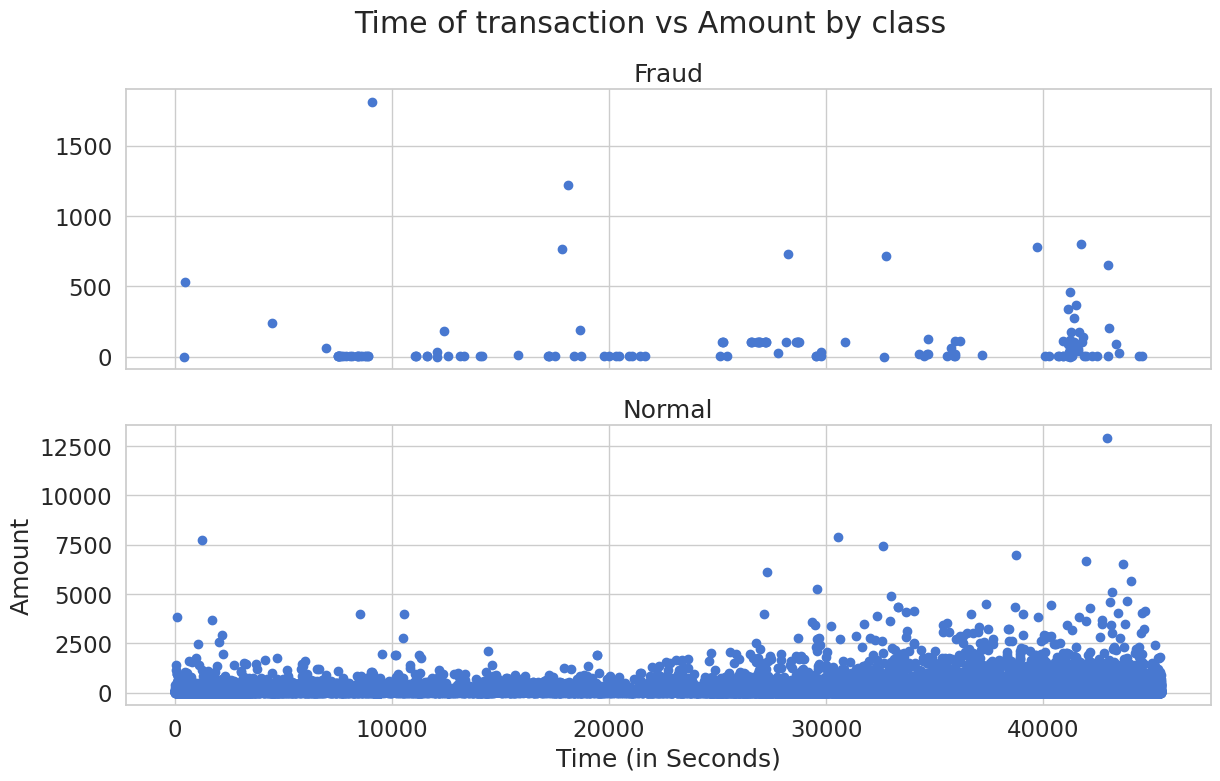

In [ ]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transaction vs Amount by class')
ax1.scatter(frauds.Time, frauds.Amount)
ax1.set_title('Fraud')
ax2.scatter(normal.Time, normal.Amount)
ax2.set_title('Normal')
plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

## PREPARING THE DATA

In [ ]:
from sklearn.preprocessing import StandardScaler

data = df.drop(['Time'], axis=1)
data['Amount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1,1))

In [ ]:
X_train, X_test = train_test_split(data, test_size = 0.2, random_state = RANDOM_SEED)
X_train = X_train[X_train.Class == 0]
X_train = X_train.drop(['Class'], axis=1)

y_test = X_test['Class']
X_test = X_test.drop(['Class'], axis = 1)

X_train = X_train.values
X_test = X_test.values

In [ ]:
X_train.shape

(41805, 29)

### BUILDING THE MODEL

In [ ]:
input_dim = X_train.shape[1]
encoding_dim = 14

In [ ]:
input_layer = Input(shape = (input_dim, ))

encoder = Dense(encoding_dim, activation = "tanh",
                activity_regularizer=regularizers.l1(10e-5))(input_layer)
encoder = Dense(int(encoding_dim / 2), activation="relu")(encoder)

decoder = Dense(int(encoding_dim / 2), activation = "tanh")(encoder)
decoder = Dense(input_dim, activation = "relu")(decoder)

autoencoder = Model(inputs = input_layer, outputs = decoder)

In [ ]:
from keras.callbacks import EarlyStopping

def build_autoencoder(input_dim, encoding_dim):

    input_layer = Input(shape=(input_dim,))

    encoder = Dense(encoding_dim, activation="tanh",
                    kernel_initializer='glorot_normal', #glorot_normal  is a weight initialization technique used in neural networks to set initial values of weights in a way that helps stabilize learning.
                    activity_regularizer=regularizers.l1(10e-5))(input_layer)
    encoder = Dense(encoding_dim // 2, activation="relu",
                    kernel_initializer='he_normal')(encoder)

    decoder = Dense(encoding_dim // 2, activation='tanh',
                    kernel_initializer='glorot_normal')(encoder)
    decoder = Dense(input_dim, activation='relu',
                    kernel_initializer='glorot_normal')(decoder)

    autoencoder = Model(inputs=input_layer, outputs=decoder)
    return autoencoder

input_dim = X_train.shape[1]
encoding_dim = 14

autoencoder = build_autoencoder(input_dim, encoding_dim)

autoencoder.compile(optimizer='adam',
                    loss='mean_squared_error',
                    metrics=['mse'])

checkpointer = ModelCheckpoint(filepath="model.h5",
                               verbose=1,
                               save_best_only=True)

tensorboard = TensorBoard(log_dir='./logs',
                          histogram_freq=1,
                          write_graph=True,
                          write_images=False)

early_stopping = EarlyStopping(monitor='val_loss',
                                patience=10,
                                verbose=1,
                                restore_best_weights=True)

nb_epoch = 100
batch_size = 32

history = autoencoder.fit(X_train, X_train,
                    epochs=nb_epoch,
                    batch_size=batch_size,
                    shuffle=True,
                    validation_data=(X_test, X_test),
                    verbose=1,
                    callbacks=[checkpointer, tensorboard])

Epoch 1/100
1307/1307 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.0318 - mse: 1.0091
Epoch 1: val_loss improved from inf to 1.03046, saving model to model.h5


1307/1307 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - loss: 1.0317 - mse: 1.0090 - val_loss: 1.0305 - val_mse: 1.0130
Epoch 2/100
1303/1307 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8780 - mse: 0.8618
Epoch 2: val_loss improved from 1.03046 to 0.97532, saving model to model.h5


1307/1307 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.8778 - mse: 0.8616 - val_loss: 0.9753 - val_mse: 0.9619
Epoch 3/100
1304/1307 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8277 - mse: 0.8152
Epoch 3: val_loss improved from 0.97532 to 0.95856, saving model to model.h5


1307/1307 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.8276 - mse: 0.8151 - val_loss: 0.9586 - val_mse: 0.9476
Epoch 4/100
1293/1307 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7930 - mse: 0.7826
Epoch 4: val_loss improved from 0.95856 to 0.94592, saving model to model.h5


1307/1307 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.7931 - mse: 0.7826 - val_loss: 0.9459 - val_mse: 0.9360
Epoch 5/100
1301/1307 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7976 - mse: 0.7881
Epoch 5: val_loss improved from 0.94592 to 0.93817, saving model to model.h5


1307/1307 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.7976 - mse: 0.7880 - val_loss: 0.9382 - val_mse: 0.9289
Epoch 6/100
1294/1307 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7717 - mse: 0.7627
Epoch 6: val_loss improved from 0.93817 to 0.92975, saving model to model.h5


1307/1307 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.7718 - mse: 0.7628 - val_loss: 0.9298 - val_mse: 0.9208
Epoch 7/100
1305/1307 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7511 - mse: 0.7424
Epoch 7: val_loss improved from 0.92975 to 0.92380, saving model to model.h5


1307/1307 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - loss: 0.7512 - mse: 0.7425 - val_loss: 0.9238 - val_mse: 0.9151
Epoch 8/100
1299/1307 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7723 - mse: 0.7638
Epoch 8: val_loss improved from 0.92380 to 0.92130, saving model to model.h5


1307/1307 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: 0.7722 - mse: 0.7637 - val_loss: 0.9213 - val_mse: 0.9128
Epoch 9/100
1299/1307 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7517 - mse: 0.7433
Epoch 9: val_loss improved from 0.92130 to 0.91897, saving model to model.h5


1307/1307 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.7517 - mse: 0.7434 - val_loss: 0.9190 - val_mse: 0.9105
Epoch 10/100
1297/1307 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7797 - mse: 0.7713
Epoch 10: val_loss improved from 0.91897 to 0.91805, saving model to model.h5


1307/1307 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.7795 - mse: 0.7712 - val_loss: 0.9181 - val_mse: 0.9097
Epoch 11/100
1299/1307 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7401 - mse: 0.7319
Epoch 11: val_loss improved from 0.91805 to 0.91577, saving model to model.h5


1307/1307 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 0.7402 - mse: 0.7320 - val_loss: 0.9158 - val_mse: 0.9074
Epoch 12/100
1304/1307 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7731 - mse: 0.7649
Epoch 12: val_loss did not improve from 0.91577
1307/1307 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.7731 - mse: 0.7649 - val_loss: 0.9159 - val_mse: 0.9075
Epoch 13/100
1306/1307 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7578 - mse: 0.7496
Epoch 13: val_loss improved from 0.91577 to 0.91195, saving model to model.h5


1307/1307 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 0.7578 - mse: 0.7496 - val_loss: 0.9120 - val_mse: 0.9036
Epoch 14/100
1294/1307 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7612 - mse: 0.7530
Epoch 14: val_loss improved from 0.91195 to 0.90957, saving model to model.h5


1307/1307 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.7611 - mse: 0.7529 - val_loss: 0.9096 - val_mse: 0.9012
Epoch 15/100
1299/1307 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7274 - mse: 0.7192
Epoch 15: val_loss improved from 0.90957 to 0.90657, saving model to model.h5


1307/1307 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.7276 - mse: 0.7194 - val_loss: 0.9066 - val_mse: 0.8982
Epoch 16/100
1296/1307 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7430 - mse: 0.7347
Epoch 16: val_loss improved from 0.90657 to 0.90476, saving model to model.h5


1307/1307 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - loss: 0.7430 - mse: 0.7348 - val_loss: 0.9048 - val_mse: 0.8963
Epoch 17/100
1296/1307 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7383 - mse: 0.7300
Epoch 17: val_loss improved from 0.90476 to 0.90271, saving model to model.h5


1307/1307 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.7384 - mse: 0.7301 - val_loss: 0.9027 - val_mse: 0.8942
Epoch 18/100
1298/1307 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7434 - mse: 0.7350
Epoch 18: val_loss did not improve from 0.90271
1307/1307 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: 0.7434 - mse: 0.7350 - val_loss: 0.9040 - val_mse: 0.8952
Epoch 19/100
1294/1307 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7483 - mse: 0.7397
Epoch 19: val_loss improved from 0.90271 to 0.90028, saving model to model.h5


1307/1307 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: 0.7483 - mse: 0.7397 - val_loss: 0.9003 - val_mse: 0.8915
Epoch 20/100
1303/1307 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7267 - mse: 0.7180
Epoch 20: val_loss improved from 0.90028 to 0.89656, saving model to model.h5


1307/1307 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.7268 - mse: 0.7181 - val_loss: 0.8966 - val_mse: 0.8877
Epoch 21/100
1296/1307 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7382 - mse: 0.7295
Epoch 21: val_loss did not improve from 0.89656
1307/1307 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: 0.7383 - mse: 0.7296 - val_loss: 0.9004 - val_mse: 0.8914
Epoch 22/100
1290/1307 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7562 - mse: 0.7473
Epoch 22: val_loss improved from 0.89656 to 0.89520, saving model to model.h5


1307/1307 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.7560 - mse: 0.7472 - val_loss: 0.8952 - val_mse: 0.8862
Epoch 23/100
1300/1307 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7375 - mse: 0.7286
Epoch 23: val_loss improved from 0.89520 to 0.89506, saving model to model.h5


1307/1307 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.7375 - mse: 0.7287 - val_loss: 0.8951 - val_mse: 0.8860
Epoch 24/100
1296/1307 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7241 - mse: 0.7152
Epoch 24: val_loss did not improve from 0.89506
1307/1307 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.7242 - mse: 0.7153 - val_loss: 0.8969 - val_mse: 0.8878
Epoch 25/100
1295/1307 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7453 - mse: 0.7363
Epoch 25: val_loss improved from 0.89506 to 0.89225, saving model to model.h5


1307/1307 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.7453 - mse: 0.7363 - val_loss: 0.8922 - val_mse: 0.8832
Epoch 26/100
1290/1307 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7342 - mse: 0.7253
Epoch 26: val_loss did not improve from 0.89225
1307/1307 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.7343 - mse: 0.7253 - val_loss: 0.8932 - val_mse: 0.8840
Epoch 27/100
1307/1307 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7367 - mse: 0.7277
Epoch 27: val_loss did not improve from 0.89225
1307/1307 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: 0.7367 - mse: 0.7277 - val_loss: 0.8930 - val_mse: 0.8838
Epoch 28/100
1301/1307 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7347 - mse: 0.7256
Epoch 28: val_loss did not improve from 0.89225
1307/1307 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: 0.7347 - mse: 0.7256 - val_loss: 0.8976 - val_mse: 0.8884
Epoch 29/100
1305/1307 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7279 - mse: 0.7188
Epoch 29: val_loss did not improve from 0.89225
1307/1307 ━━━━━━━━━━━━━━━━━━━━

1307/1307 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.7426 - mse: 0.7335 - val_loss: 0.8907 - val_mse: 0.8814
Epoch 31/100
1301/1307 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7382 - mse: 0.7291
Epoch 31: val_loss did not improve from 0.89068
1307/1307 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.7382 - mse: 0.7291 - val_loss: 0.8925 - val_mse: 0.8833
Epoch 32/100
1305/1307 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7366 - mse: 0.7275
Epoch 32: val_loss did not improve from 0.89068
1307/1307 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.7367 - mse: 0.7275 - val_loss: 0.8919 - val_mse: 0.8826
Epoch 33/100
1295/1307 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7131 - mse: 0.7040
Epoch 33: val_loss did not improve from 0.89068
1307/1307 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: 0.7133 - mse: 0.7042 - val_loss: 0.8931 - val_mse: 0.8838
Epoch 34/100
1298/1307 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7269 - mse: 0.7178
Epoch 34: val_loss improved from 0.89068 to 0.88876, saving model to model.h5


1307/1307 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: 0.7270 - mse: 0.7179 - val_loss: 0.8888 - val_mse: 0.8794
Epoch 35/100
1302/1307 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7306 - mse: 0.7214
Epoch 35: val_loss did not improve from 0.88876
1307/1307 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.7306 - mse: 0.7214 - val_loss: 0.8904 - val_mse: 0.8811
Epoch 36/100
1294/1307 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7132 - mse: 0.7040
Epoch 36: val_loss did not improve from 0.88876
1307/1307 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: 0.7135 - mse: 0.7043 - val_loss: 0.8893 - val_mse: 0.8799
Epoch 37/100
1301/1307 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7586 - mse: 0.7493
Epoch 37: val_loss improved from 0.88876 to 0.88847, saving model to model.h5


1307/1307 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.7585 - mse: 0.7492 - val_loss: 0.8885 - val_mse: 0.8791
Epoch 38/100
1305/1307 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7682 - mse: 0.7589
Epoch 38: val_loss improved from 0.88847 to 0.88768, saving model to model.h5


1307/1307 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.7681 - mse: 0.7589 - val_loss: 0.8877 - val_mse: 0.8783
Epoch 39/100
1303/1307 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.7159 - mse: 0.7067
Epoch 39: val_loss did not improve from 0.88768
1307/1307 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - loss: 0.7160 - mse: 0.7068 - val_loss: 0.8892 - val_mse: 0.8797
Epoch 40/100
1304/1307 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7618 - mse: 0.7524
Epoch 40: val_loss did not improve from 0.88768
1307/1307 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.7617 - mse: 0.7523 - val_loss: 0.8887 - val_mse: 0.8793
Epoch 41/100
1295/1307 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7537 - mse: 0.7444
Epoch 41: val_loss improved from 0.88768 to 0.88723, saving model to model.h5


1307/1307 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.7535 - mse: 0.7443 - val_loss: 0.8872 - val_mse: 0.8778
Epoch 42/100
1291/1307 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7513 - mse: 0.7420
Epoch 42: val_loss did not improve from 0.88723
1307/1307 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: 0.7511 - mse: 0.7419 - val_loss: 0.8880 - val_mse: 0.8786
Epoch 43/100
1298/1307 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7134 - mse: 0.7042
Epoch 43: val_loss did not improve from 0.88723
1307/1307 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.7136 - mse: 0.7044 - val_loss: 0.8882 - val_mse: 0.8788
Epoch 44/100
1298/1307 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7334 - mse: 0.7242
Epoch 44: val_loss did not improve from 0.88723
1307/1307 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.7335 - mse: 0.7242 - val_loss: 0.8928 - val_mse: 0.8833
Epoch 45/100
1305/1307 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7142 - mse: 0.7048
Epoch 45: val_loss improved from 0.88723 to 0.88637, saving model to model.h5


1307/1307 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.7142 - mse: 0.7049 - val_loss: 0.8864 - val_mse: 0.8769
Epoch 46/100
1301/1307 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7542 - mse: 0.7449
Epoch 46: val_loss improved from 0.88637 to 0.88621, saving model to model.h5


1307/1307 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.7541 - mse: 0.7448 - val_loss: 0.8862 - val_mse: 0.8768
Epoch 47/100
1298/1307 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7221 - mse: 0.7127
Epoch 47: val_loss improved from 0.88621 to 0.88584, saving model to model.h5


1307/1307 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: 0.7222 - mse: 0.7128 - val_loss: 0.8858 - val_mse: 0.8763
Epoch 48/100
1302/1307 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7226 - mse: 0.7133
Epoch 48: val_loss did not improve from 0.88584
1307/1307 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.7227 - mse: 0.7133 - val_loss: 0.8917 - val_mse: 0.8822
Epoch 49/100
1305/1307 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7386 - mse: 0.7292
Epoch 49: val_loss did not improve from 0.88584
1307/1307 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.7386 - mse: 0.7292 - val_loss: 0.8859 - val_mse: 0.8764
Epoch 50/100
1298/1307 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.7319 - mse: 0.7225
Epoch 50: val_loss did not improve from 0.88584
1307/1307 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - loss: 0.7319 - mse: 0.7225 - val_loss: 0.8860 - val_mse: 0.8765
Epoch 51/100
1299/1307 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7566 - mse: 0.7472
Epoch 51: val_loss did not improve from 0.88584
1307/1307 ━━━━━━━━━━━━━━━━━━━━

1307/1307 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: 0.7355 - mse: 0.7262 - val_loss: 0.8852 - val_mse: 0.8757
Epoch 53/100
1302/1307 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7439 - mse: 0.7345
Epoch 53: val_loss did not improve from 0.88521
1307/1307 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.7438 - mse: 0.7345 - val_loss: 0.8865 - val_mse: 0.8770
Epoch 54/100
1298/1307 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7017 - mse: 0.6924
Epoch 54: val_loss improved from 0.88521 to 0.88371, saving model to model.h5


1307/1307 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.7019 - mse: 0.6926 - val_loss: 0.8837 - val_mse: 0.8742
Epoch 55/100
1305/1307 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7262 - mse: 0.7169
Epoch 55: val_loss did not improve from 0.88371
1307/1307 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.7262 - mse: 0.7169 - val_loss: 0.8846 - val_mse: 0.8752
Epoch 56/100
1305/1307 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7321 - mse: 0.7227
Epoch 56: val_loss did not improve from 0.88371
1307/1307 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 0.7321 - mse: 0.7227 - val_loss: 0.8848 - val_mse: 0.8754
Epoch 57/100
1303/1307 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7400 - mse: 0.7307
Epoch 57: val_loss did not improve from 0.88371
1307/1307 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.7400 - mse: 0.7307 - val_loss: 0.8878 - val_mse: 0.8782
Epoch 58/100
1303/1307 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7107 - mse: 0.7014
Epoch 58: val_loss did not improve from 0.88371
1307/1307 ━━━━━━━━━━━━━━━━━━━━ 6

1307/1307 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.7444 - mse: 0.7350 - val_loss: 0.8836 - val_mse: 0.8740
Epoch 66/100
1294/1307 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7200 - mse: 0.7106
Epoch 66: val_loss improved from 0.88363 to 0.87991, saving model to model.h5


1307/1307 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.7201 - mse: 0.7107 - val_loss: 0.8799 - val_mse: 0.8703
Epoch 67/100
1299/1307 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7101 - mse: 0.7007
Epoch 67: val_loss did not improve from 0.87991
1307/1307 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.7103 - mse: 0.7008 - val_loss: 0.8805 - val_mse: 0.8708
Epoch 68/100
1307/1307 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7235 - mse: 0.7140
Epoch 68: val_loss improved from 0.87991 to 0.87895, saving model to model.h5


1307/1307 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.7235 - mse: 0.7140 - val_loss: 0.8790 - val_mse: 0.8693
Epoch 69/100
1291/1307 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7226 - mse: 0.7132
Epoch 69: val_loss improved from 0.87895 to 0.87773, saving model to model.h5


1307/1307 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.7227 - mse: 0.7133 - val_loss: 0.8777 - val_mse: 0.8681
Epoch 70/100
1302/1307 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7261 - mse: 0.7166
Epoch 70: val_loss did not improve from 0.87773
1307/1307 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.7261 - mse: 0.7167 - val_loss: 0.8791 - val_mse: 0.8695
Epoch 71/100
1298/1307 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7470 - mse: 0.7375
Epoch 71: val_loss improved from 0.87773 to 0.87761, saving model to model.h5


1307/1307 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.7469 - mse: 0.7374 - val_loss: 0.8776 - val_mse: 0.8681
Epoch 72/100
1305/1307 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7250 - mse: 0.7156
Epoch 72: val_loss improved from 0.87761 to 0.87733, saving model to model.h5


1307/1307 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: 0.7250 - mse: 0.7156 - val_loss: 0.8773 - val_mse: 0.8677
Epoch 73/100
1297/1307 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7283 - mse: 0.7188
Epoch 73: val_loss did not improve from 0.87733
1307/1307 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.7283 - mse: 0.7188 - val_loss: 0.8785 - val_mse: 0.8688
Epoch 74/100
1291/1307 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7640 - mse: 0.7545
Epoch 74: val_loss did not improve from 0.87733
1307/1307 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - loss: 0.7635 - mse: 0.7540 - val_loss: 0.8774 - val_mse: 0.8678
Epoch 75/100
1298/1307 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7402 - mse: 0.7308
Epoch 75: val_loss improved from 0.87733 to 0.87594, saving model to model.h5


1307/1307 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: 0.7401 - mse: 0.7307 - val_loss: 0.8759 - val_mse: 0.8663
Epoch 76/100
1294/1307 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7263 - mse: 0.7168
Epoch 76: val_loss did not improve from 0.87594
1307/1307 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.7263 - mse: 0.7168 - val_loss: 0.8767 - val_mse: 0.8670
Epoch 77/100
1292/1307 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7089 - mse: 0.6994
Epoch 77: val_loss did not improve from 0.87594
1307/1307 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.7091 - mse: 0.6996 - val_loss: 0.8764 - val_mse: 0.8668
Epoch 78/100
1294/1307 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7318 - mse: 0.7224
Epoch 78: val_loss did not improve from 0.87594
1307/1307 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.7318 - mse: 0.7224 - val_loss: 0.8765 - val_mse: 0.8668
Epoch 79/100
1304/1307 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7159 - mse: 0.7064
Epoch 79: val_loss improved from 0.87594 to 0.87547, saving model to model.h5


1307/1307 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.7160 - mse: 0.7064 - val_loss: 0.8755 - val_mse: 0.8658
Epoch 80/100
1292/1307 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7246 - mse: 0.7151
Epoch 80: val_loss did not improve from 0.87547
1307/1307 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.7246 - mse: 0.7151 - val_loss: 0.8759 - val_mse: 0.8663
Epoch 81/100
1305/1307 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7318 - mse: 0.7222
Epoch 81: val_loss did not improve from 0.87547
1307/1307 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: 0.7318 - mse: 0.7222 - val_loss: 0.8779 - val_mse: 0.8683
Epoch 82/100
1296/1307 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7117 - mse: 0.7023
Epoch 82: val_loss did not improve from 0.87547
1307/1307 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.7119 - mse: 0.7024 - val_loss: 0.8769 - val_mse: 0.8672
Epoch 83/100
1290/1307 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7039 - mse: 0.6944
Epoch 83: val_loss improved from 0.87547 to 0.87477, saving model to model.h5


1307/1307 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.7043 - mse: 0.6947 - val_loss: 0.8748 - val_mse: 0.8651
Epoch 84/100
1298/1307 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7450 - mse: 0.7355
Epoch 84: val_loss did not improve from 0.87477
1307/1307 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: 0.7448 - mse: 0.7353 - val_loss: 0.8752 - val_mse: 0.8656
Epoch 85/100
1296/1307 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6983 - mse: 0.6888
Epoch 85: val_loss improved from 0.87477 to 0.87404, saving model to model.h5


1307/1307 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: 0.6986 - mse: 0.6891 - val_loss: 0.8740 - val_mse: 0.8644
Epoch 86/100
1299/1307 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7511 - mse: 0.7416
Epoch 86: val_loss did not improve from 0.87404
1307/1307 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.7510 - mse: 0.7414 - val_loss: 0.8759 - val_mse: 0.8663
Epoch 87/100
1298/1307 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7416 - mse: 0.7321
Epoch 87: val_loss improved from 0.87404 to 0.87381, saving model to model.h5


1307/1307 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: 0.7415 - mse: 0.7320 - val_loss: 0.8738 - val_mse: 0.8641
Epoch 88/100
1292/1307 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7288 - mse: 0.7192
Epoch 88: val_loss did not improve from 0.87381
1307/1307 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.7288 - mse: 0.7192 - val_loss: 0.8752 - val_mse: 0.8654
Epoch 89/100
1306/1307 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7564 - mse: 0.7468
Epoch 89: val_loss did not improve from 0.87381
1307/1307 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: 0.7564 - mse: 0.7467 - val_loss: 0.8749 - val_mse: 0.8651
Epoch 90/100
1297/1307 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7067 - mse: 0.6971
Epoch 90: val_loss did not improve from 0.87381
1307/1307 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: 0.7069 - mse: 0.6973 - val_loss: 0.8755 - val_mse: 0.8657
Epoch 91/100
1299/1307 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7343 - mse: 0.7247
Epoch 91: val_loss did not improve from 0.87381
1307/1307 ━━━━━━━━━━━━━━━━━━━

1307/1307 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - loss: 0.7378 - mse: 0.7281 - val_loss: 0.8736 - val_mse: 0.8638
Epoch 97/100
1290/1307 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7471 - mse: 0.7374
Epoch 97: val_loss did not improve from 0.87363
1307/1307 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.7469 - mse: 0.7371 - val_loss: 0.8738 - val_mse: 0.8639
Epoch 98/100
1307/1307 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7520 - mse: 0.7422
Epoch 98: val_loss did not improve from 0.87363
1307/1307 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: 0.7520 - mse: 0.7422 - val_loss: 0.8748 - val_mse: 0.8648
Epoch 99/100
1296/1307 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7091 - mse: 0.6993
Epoch 99: val_loss did not improve from 0.87363
1307/1307 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: 0.7092 - mse: 0.6995 - val_loss: 0.8738 - val_mse: 0.8639
Epoch 100/100
1297/1307 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7331 - mse: 0.7233
Epoch 100: val_loss did not improve from 0.87363
1307/1307 ━━━━━━━━━━━━━━━━━━

In [ ]:
autoencoder = load_model('model.h5')

## EVALUATION

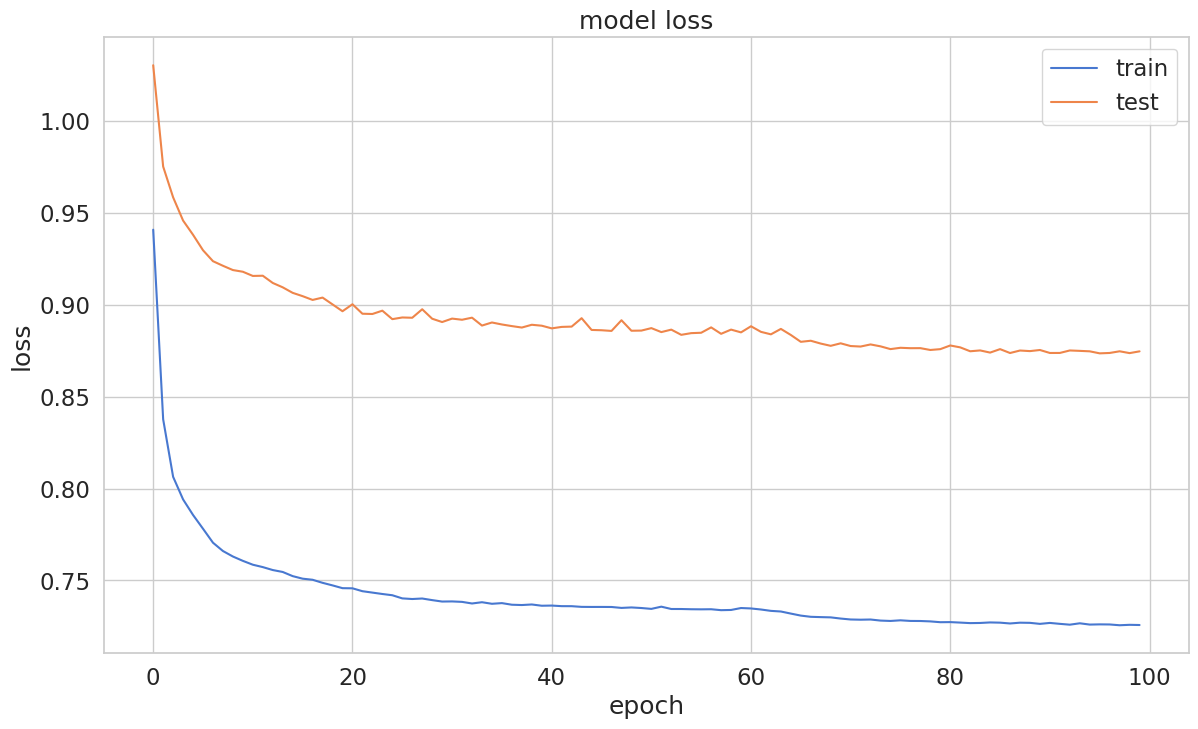

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper right');

In [ ]:
predictions = autoencoder.predict(X_test)

328/328 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [ ]:
mse = np.mean(np.power(X_test - predictions, 2), axis = 1)
error_df = pd.DataFrame({'reconstruction_error':mse,
                         'true_class':y_test})
error_df.describe()
#reconstruction error is the difference between the original input and the output generated by an autoencoder after encoding and decoding the data.

,reconstruction_error,true_class
count,10481.000000,10481.000000
mean,0.863787,0.003149
std,5.610319,0.056026
min,0.030921,0.000000
25%,0.211626,0.000000
50%,0.362328,0.000000
75%,0.593666,0.000000
max,412.756968,1.000000


### RECONSTRUCTION ERROR WITHOUT FRAUD

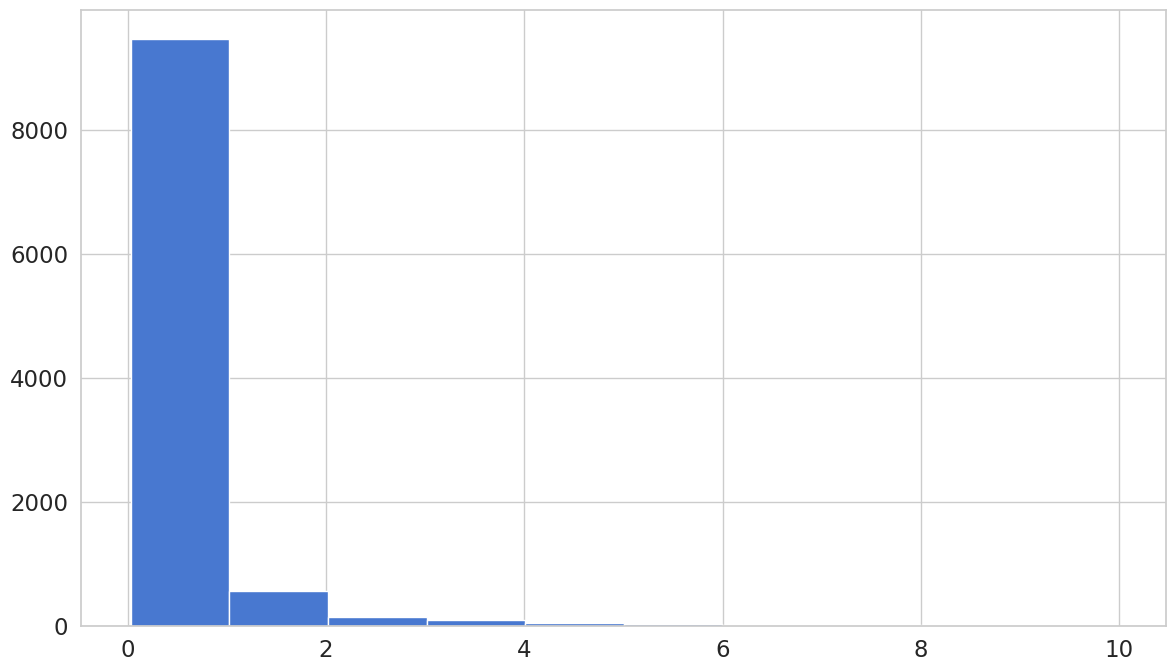

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
normal_error_df = error_df[(error_df['true_class'] == 0) & (error_df['reconstruction_error'] < 10)]
_ = ax.hist(normal_error_df.reconstruction_error.values, bins = 10)

### RECONSTRUCTION ERROR WITH FRAUD

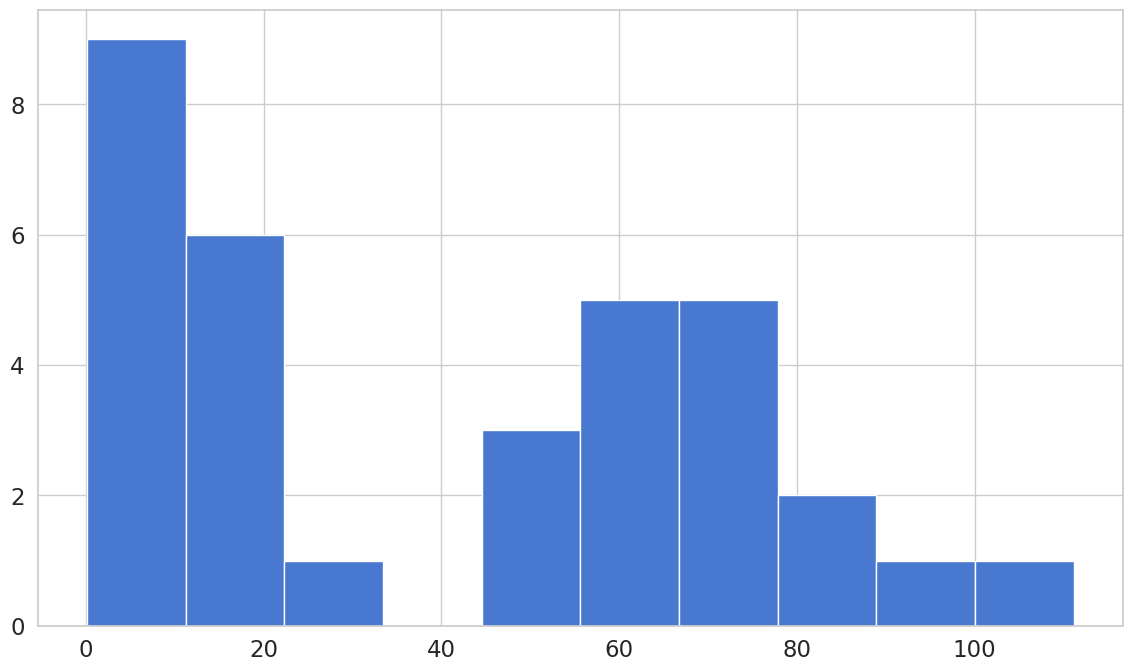

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
fraud_error_df = error_df[error_df['true_class'] == 1]
_ = ax.hist(fraud_error_df.reconstruction_error.values, bins=10)

## PRECISION VS RECALL

In [ ]:
from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc,
                             roc_curve, recall_score, classification_report, f1_score,
                             precision_recall_fscore_support)

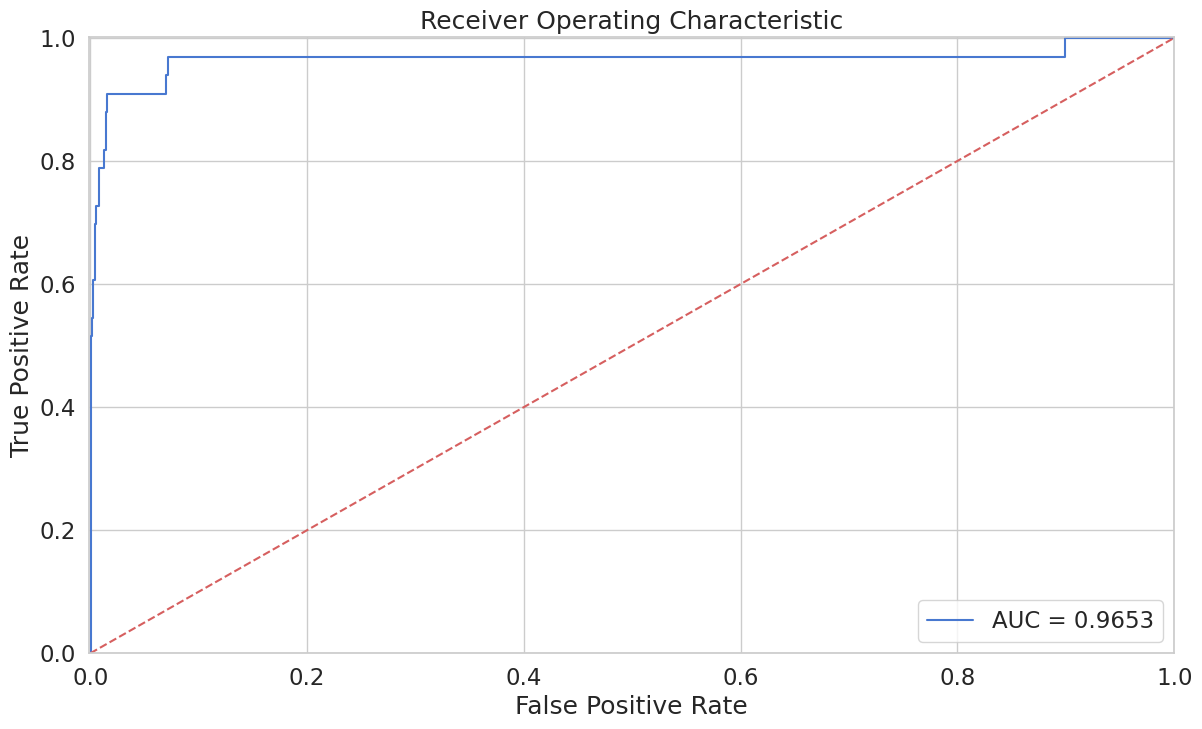

In [ ]:
fpr, tpr, thresholds = roc_curve(error_df.true_class, error_df.reconstruction_error)
roc_auc = auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, label='AUC = %0.4f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.001, 1])
plt.ylim([0, 1.001])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show();

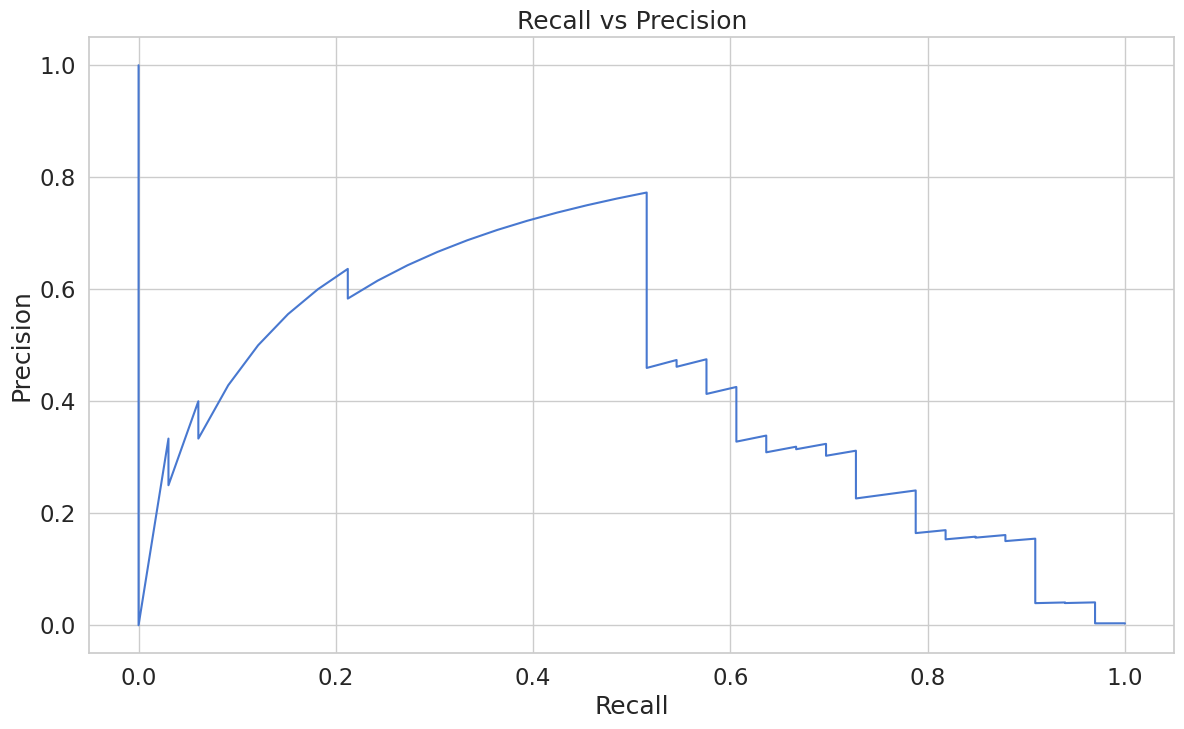

In [ ]:
precision, recall, th = precision_recall_curve(error_df.true_class, error_df.reconstruction_error)
plt.plot(recall, precision, 'b', label='Precision-Recall curve')
plt.title('Recall vs Precision')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

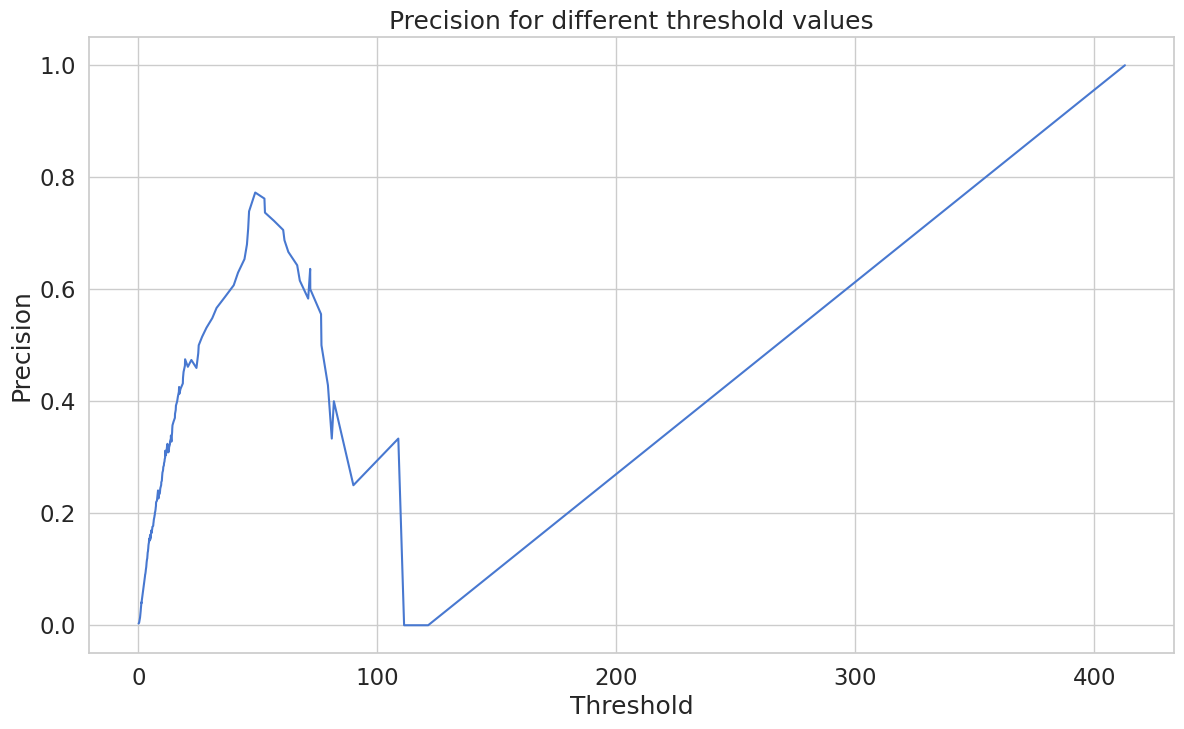

In [ ]:
plt.plot(th, precision[1:], 'b', label='Threshold-Precision curve')
plt.title('Precision for different threshold values')
plt.xlabel('Threshold')
plt.ylabel('Precision')
plt.show()

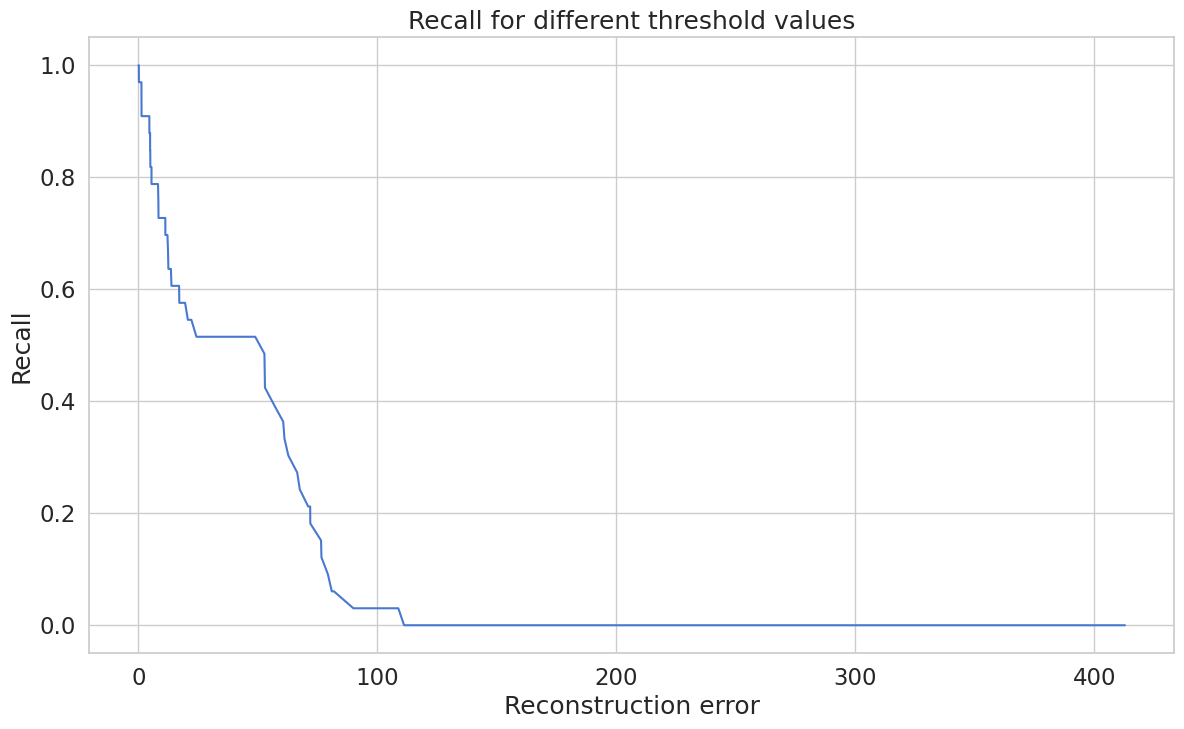

In [ ]:
plt.plot(th, recall[1:], 'b', label='Threshold-Recall curve')
plt.title('Recall for different threshold values')
plt.xlabel('Reconstruction error')
plt.ylabel('Recall')
plt.show()

## PREDICTION

In [ ]:
threshold = 2.9

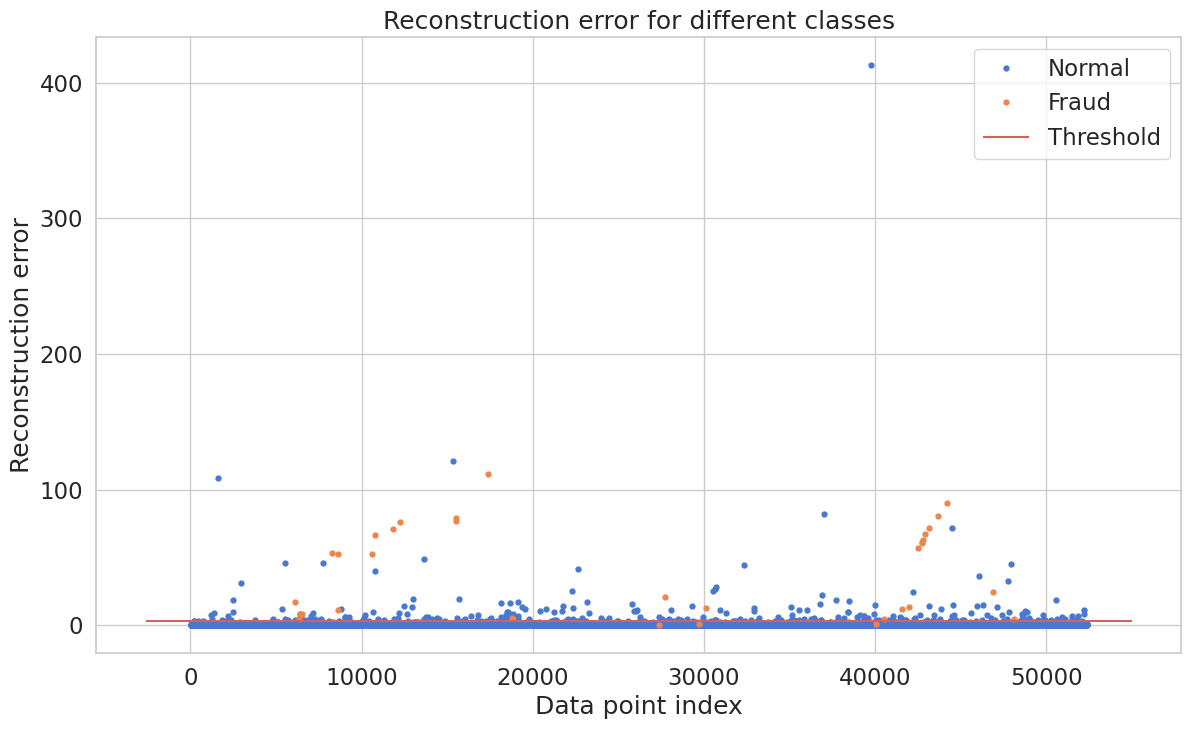

In [ ]:
groups = error_df.groupby('true_class')
fig, ax = plt.subplots()
for name, group in groups:
    ax.plot(group.index, group.reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "Fraud" if name == 1 else "Normal")
ax.hlines(threshold, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();

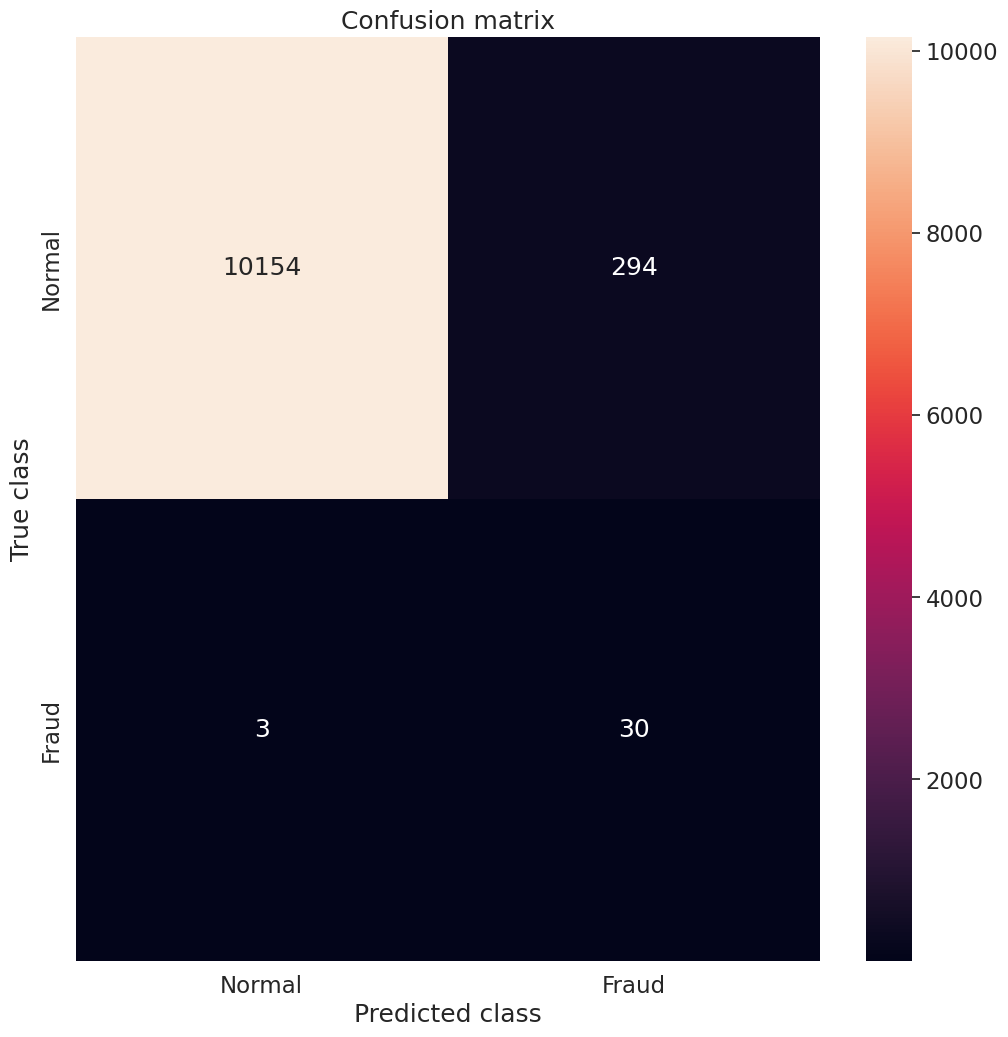

In [ ]:
y_pred = [1 if e > threshold else 0 for e in error_df.reconstruction_error.values]
conf_matrix = confusion_matrix(error_df.true_class, y_pred)
plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

### Analyzing correct and incorrect classification

In [ ]:
fraud_indices = y_test[y_test == 1].index

predicted_fraud_indices = X_test[np.array(y_pred) == 1].index

correctly_classified_fraud = set(fraud_indices) & set(predicted_fraud_indices)
num_correct_fraud = len(correctly_classified_fraud)
print(f"\nNumber of Correctly Classified Fraudulent Transactions: {num_correct_fraud}")

incorrectly_classified_fraud = set(predicted_fraud_indices) - set(fraud_indices)
num_incorrect_fraud = len(incorrectly_classified_fraud)
print(f"Number of Incorrectly Classified Fraudulent Transactions (False Positives): {num_incorrect_fraud}")

num_actual_fraud = len(fraud_indices)
print(f"Number of Actual Fraud Transactions: {num_actual_fraud}")


Number of Correctly Classified Fraudulent Transactions: 30
Number of Incorrectly Classified Fraudulent Transactions (False Positives): 294
Number of Actual Fraud Transactions: 33


## THRESHOLD OPTIMIZATION

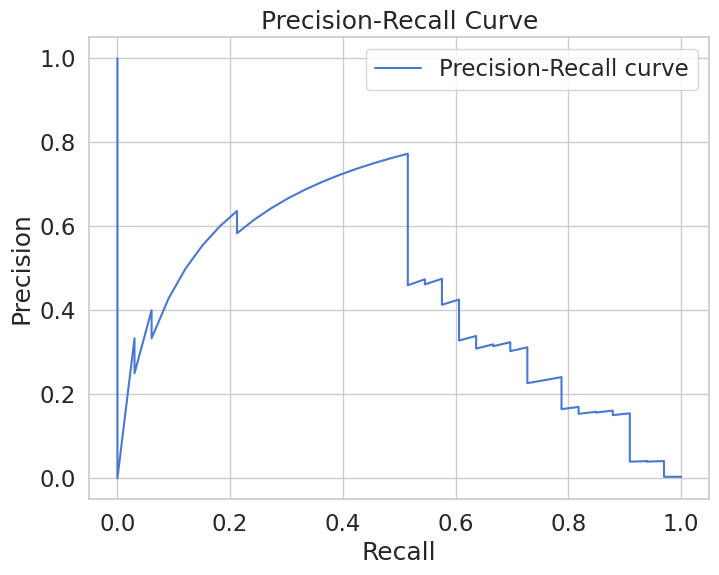

In [ ]:
from sklearn.metrics import precision_recall_curve, roc_curve, auc

precision, recall, thresholds = precision_recall_curve(error_df.true_class, error_df.reconstruction_error)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='b', label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.show()

In [ ]:
# finding the threshold that maximizes F1-score (or another metric)
f1_scores = 2 * precision[:-1] * recall[:-1] / (precision[:-1] + recall[:-1] + 1e-8)  # Avoid division by zero
best_threshold_index = np.argmax(f1_scores)
best_threshold = thresholds[best_threshold_index]
best_f1 = f1_scores[best_threshold_index]

print(f"Best Threshold (F1-score): {best_threshold:.4f}")
print(f"Best F1-score: {best_f1:.4f}")

Best Threshold (F1-score): 52.6969
Best F1-score: 0.6182


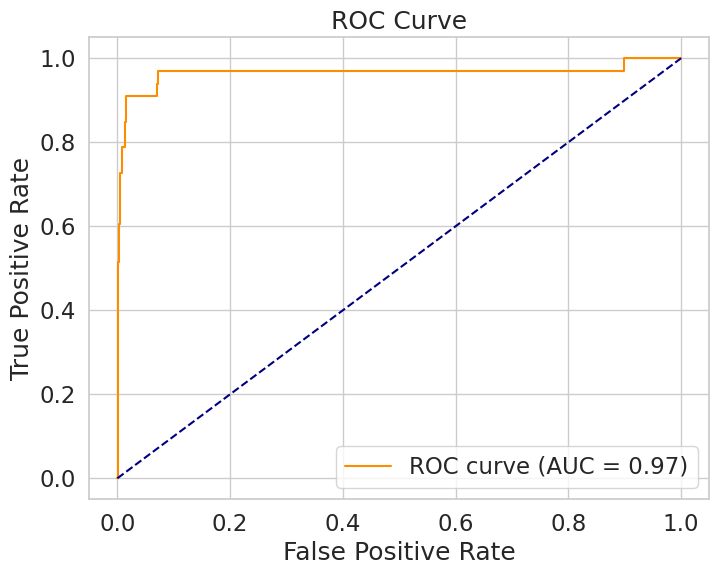

In [ ]:
fpr, tpr, thresholds_roc = roc_curve(error_df.true_class, error_df.reconstruction_error)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


Classification Report with Optimal Threshold:
               precision    recall  f1-score   support

      Normal       1.00      1.00      1.00     10448
       Fraud       0.76      0.48      0.59        33

    accuracy                           1.00     10481
   macro avg       0.88      0.74      0.80     10481
weighted avg       1.00      1.00      1.00     10481



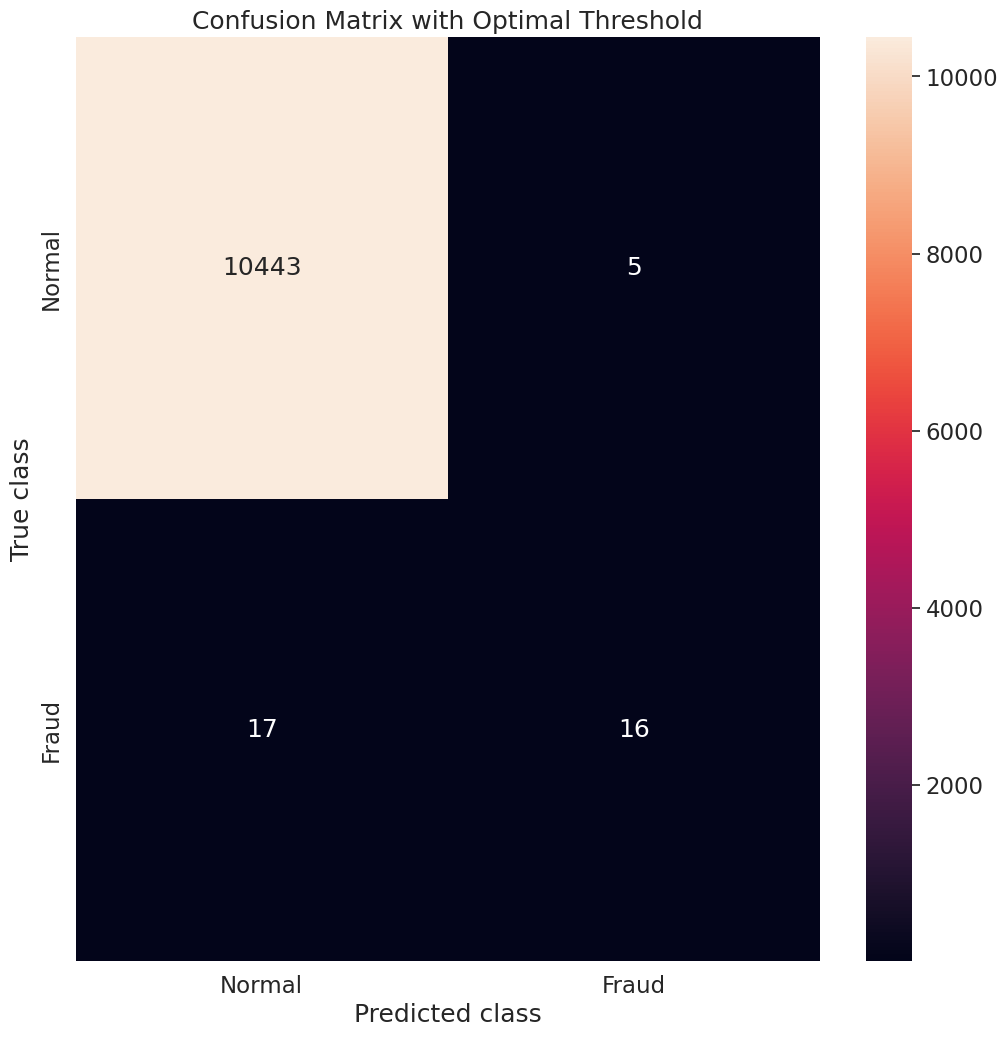

In [ ]:
y_pred_optimal = [1 if e > best_threshold else 0 for e in error_df.reconstruction_error.values]

print("\nClassification Report with Optimal Threshold:\n",
      classification_report(error_df.true_class, y_pred_optimal, target_names=LABELS))

conf_matrix_optimal = confusion_matrix(error_df.true_class, y_pred_optimal)
plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix_optimal, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d")
plt.title("Confusion Matrix with Optimal Threshold")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

## HYPERPARAMETER TUNING

In [ ]:
encoding_dims = [8, 14, 20]
best_f1 = 0
best_encoding_dim = 0
best_model = None

for encoding_dim in encoding_dims:

    input_dim = X_train.shape[1]
    input_layer = Input(shape=(input_dim,))
    encoder = Dense(encoding_dim, activation="tanh")(input_layer)
    decoder = Dense(input_dim, activation="relu")(encoder)
    autoencoder = Model(inputs=input_layer, outputs=decoder)
    autoencoder.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = autoencoder.fit(X_train, X_train,
                              epochs = 50,
                              batch_size = 32,
                              shuffle = True,
                              validation_data = (X_test, X_test),
                              verbose = 0,
                              callbacks = [early_stopping])

In [ ]:
predictions = autoencoder.predict(X_test)
mse = np.mean(np.power(X_test - predictions, 2), axis=1)
error_df = pd.DataFrame({'reconstruction_error': mse, 'true_class': y_test})

328/328 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [ ]:
precision, recall, thresholds = precision_recall_curve(error_df.true_class, error_df.reconstruction_error)
f1_scores = 2 * precision[:-1] * recall[:-1] / (precision[:-1] + recall[:-1] + 1e-8)
best_threshold_index = np.argmax(f1_scores)
best_threshold = thresholds[best_threshold_index]
f1 = f1_scores[best_threshold_index]

if f1 > best_f1:
        best_f1 = f1
        best_encoding_dim = encoding_dim
        best_model = autoencoder  # Store the best model

print(f"\nBest Encoding Dimension: {best_encoding_dim}")
print(f"Best F1-score: {best_f1:.4f}")


Best Encoding Dimension: 20
Best F1-score: 0.6415


In [ ]:
predictions_best_model = best_model.predict(X_test)
mse_best_model = np.mean(np.power(X_test - predictions_best_model, 2), axis=1)
error_df_best_model = pd.DataFrame({'reconstruction_error': mse_best_model, 'true_class': y_test})

328/328 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [ ]:
precision_best_model, recall_best_model, thresholds_best_model = precision_recall_curve(
    error_df_best_model.true_class, error_df_best_model.reconstruction_error
)
f1_scores_best_model = 2 * precision_best_model[:-1] * recall_best_model[:-1] / (
    precision_best_model[:-1] + recall_best_model[:-1] + 1e-8
)
best_threshold_index_best_model = np.argmax(f1_scores_best_model)
best_threshold_best_model = thresholds_best_model[best_threshold_index_best_model]

In [ ]:
y_pred_best_model = [
    1 if e > best_threshold_best_model else 0
    for e in error_df_best_model.reconstruction_error.values
]


Classification Report for Best Model:
               precision    recall  f1-score   support

      Normal       1.00      1.00      1.00     10448
       Fraud       0.84      0.48      0.62        33

    accuracy                           1.00     10481
   macro avg       0.92      0.74      0.81     10481
weighted avg       1.00      1.00      1.00     10481



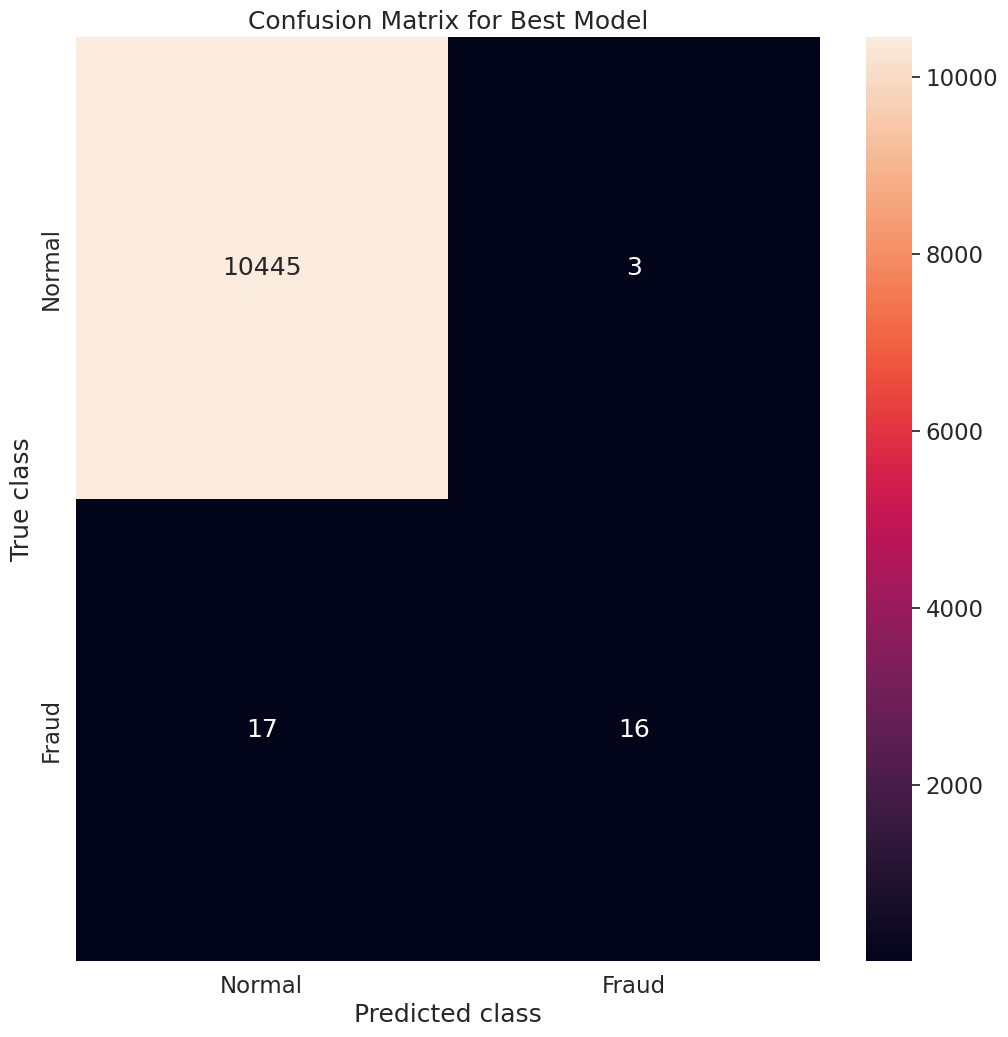

In [ ]:
print("\nClassification Report for Best Model:\n",
      classification_report(error_df_best_model.true_class, y_pred_best_model, target_names=LABELS))

conf_matrix_best_model = confusion_matrix(error_df_best_model.true_class, y_pred_best_model)
plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix_best_model, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d")
plt.title("Confusion Matrix for Best Model")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

## FINAL ANALYSIS OF CORRECT/INCORRECT CLASSIFICATION

In [ ]:
fraud_indices = y_test[y_test == 1].index

X_test_no_class = X_test
predicted_fraud_indices = X_test[np.array(y_pred_optimal) == 1].index

correctly_classified_fraud = set(fraud_indices) & set(predicted_fraud_indices)
num_correct_fraud = len(correctly_classified_fraud)
print(f"\nNumber of Correctly Classified Fraudulent Transactions: {num_correct_fraud}")

incorrectly_classified_fraud = set(predicted_fraud_indices) - set(fraud_indices)
num_incorrect_fraud = len(incorrectly_classified_fraud)
print(f"Number of Incorrectly Classified Fraudulent Transactions (False Positives): {num_incorrect_fraud}")

num_actual_fraud = len(fraud_indices)
print(f"Number of Actual Fraud Transactions: {num_actual_fraud}")


Number of Correctly Classified Fraudulent Transactions: 16
Number of Incorrectly Classified Fraudulent Transactions (False Positives): 5
Number of Actual Fraud Transactions: 33
